<a href="https://colab.research.google.com/github/Otavio8888/macroeconometric/blob/main/medidas_retornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medidas de Retorno e Risco de ativos individuais

Um dos principais objetivos em finanças é avaliar e gerenciar os riscos associados a uma carteira de ativos financeiros. O risco, nesse contexto, é frequentemente medido em termos de variações nos preços dos ativos, uma vez que essas variações podem afetar o desempenho e a segurança dos investimentos. Essa avaliação de risco é fundamental para investidores e gestores de portfólio, pois ajuda a entender as possíveis oscilações nos valores dos ativos e permite a adoção de estratégias adequadas para mitigar tais riscos.

Na prática, é preferível trabalhar com retornos financeiros em vez de preços, uma vez que os retornos são medidas de taxa de variação e são livres de escala. Além disso, eles exibem propriedades estatísticas mais interessantes, como estacionariedade e ergodicidade, tornando-os mais adequados para análises e modelagem. Os retornos, ao refletirem as variações percentuais, proporcionam uma base sólida para compreender o comportamento dos ativos e suas relações no mercado financeiro, permitindo a identificação de padrões e tendências.

Portanto, um dos principais objetivos é modelar os retornos financeiros, e várias classes de modelos estatísticos podem ser empregadas para essa finalidade, incluindo modelos ARMA, ARCH, GARCH, e modelos de volatilidade estocástica. Esses modelos auxiliam na previsão de retornos futuros e na estimativa de riscos, sendo ferramentas valiosas para investidores e gestores de portfólio. Além disso, a análise de retornos desempenha um papel crucial na formulação de estratégias de investimento, na avaliação de ativos em diferentes cenários de mercado e na determinação de alocações de ativos adequadas, tornando-se um elemento-chave na tomada de decisões financeiras informadas.

Para entender melhor os conceitos de retorno e risco, é fundamental considerar as seguintes medidas:

**Retornos:**
- **Retorno Líquido Simples:** Representa a variação percentual no valor de um ativo composto discretamente.
- **Retorno Bruto Simples:** Indica a variação do retorno sem considerar o percentual.
- **Retorno Composto Continuamente (log-retorno):** É uma medida que envolve o uso de logaritmos e é especialmente útil em cálculos contínuos, como a análise de ativos ao longo do tempo.
- **Retorno Geométrico:** Representa o retorno médio ponderado ao longo de vários períodos, levando em consideração a taxa composta de crescimento ao longo do tempo.

**Retornos Acumulados:**
- **Retorno simples multiperíodos:** É a variação percentual no valor de um ativo ao longo de múltiplos períodos, calculada acumulativamente.
- **Retorno Composto Continuamente (log-retorno) multiperíodos:** Reflete a variação contínua no valor de um ativo em vários períodos, considerando o crescimento ao longo do tempo.

**Retorno Anualizado:**
- **Retorno Anualizado para Retornos Simples:** É a taxa de retorno média anual, considerando retornos simples ao longo de um período.
- **Retorno Anualizado para Retornos Geométricos:** Representa a taxa de retorno média anual, considerando retornos geométricos ao longo de um período.
- **Retorno Anualizado em Janelas Deslizantes:** Calcula a taxa de retorno média anualizada em períodos móveis, útil para análise de tendências e volatilidade ao longo do tempo.

**Volatilidade:**
- **Desvio Padrão:** É uma medida que avalia a dispersão dos retornos de um ativo, indicando o grau de volatilidade.
- **Desvio Padrão Anualizado:** É o desvio padrão dos retornos ajustado para um período anual, tornando-o comparável em uma base anual.
- **Desvio Padrão Móvel:** Calcula o desvio padrão dos retornos em janelas deslizantes, permitindo uma análise da volatilidade ao longo do tempo.

O Python pode ser uma ferramenta útil para verificarmos cada medida citada acima. Como exemplo, utilizaremos dados do preço de fechamento diário do Ibovespa no período de 2018 até fim de 2022. Coletamos os dados através do Yahoo Finance pelo ticker '^BVSP'.

# Importa Biblioteca e Carrega dados

In [1]:
# Carrega bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

# Baixe os dados do Ibovespa usando o yfinance
ibovespa = yf.download('^BVSP', start='2019-01-01', end='2026-07-01')

/tmp/ipython-input-3751624117.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibovespa = yf.download('^BVSP', start='2019-01-01', end='2026-07-01')
[*********************100%***********************]  1 of 1 completed


In [2]:
ibovespa

Price,Close,High,Low,Open,Volume
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP
Date,,,,,
2019-01-02,91012.0,91479.0,87536.0,87887.0,5615400
2019-01-03,91564.0,91596.0,89922.0,91011.0,6066200
2019-01-04,91841.0,92701.0,90824.0,91577.0,5322100
2019-01-07,91699.0,92552.0,91288.0,91845.0,4565000
2019-01-08,92032.0,92231.0,91064.0,91699.0,4496500
...,...,...,...,...,...
2026-01-07,161975.0,163661.0,161746.0,163661.0,8846600
2026-01-08,162937.0,162937.0,161748.0,161975.0,8607700


# **Retornos:**

## 1. **Retorno Líquido Simples:**
   - A variação de preços entre os instantes $t-1$ e $t$ é dada por $\Delta P_t = P_t - P_{t-1}$.
   - A variação relativa de preços ou retorno líquido simples deste ativo entre os mesmos instantes é definida como: $R_t = \Delta P_t / P_{t-1}$. É também chamada de Taxa de Retorno.
   - Formulação matemática: $R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$


In [3]:
# Calculando o Retorno Líquido Simples
ibovespa['retorno_simples'] = ibovespa['Close'].pct_change()
ibovespa[['retorno_simples']]

Price,retorno_simples
Ticker,
Date,
2019-01-02,NaN
2019-01-03,0.006065
2019-01-04,0.003025
2019-01-07,-0.001546
2019-01-08,0.003631
...,...
2026-01-07,-0.010320
2026-01-08,0.005939


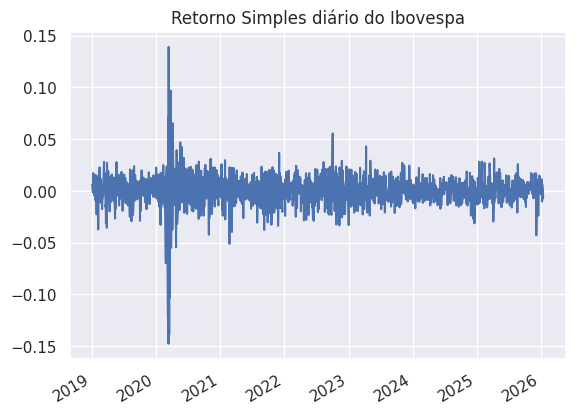

In [4]:
# Cria o gráfico do retorno diário
ibovespa['retorno_simples'].plot();
plt.title("Retorno Simples diário do Ibovespa");
plt.ylabel('')
plt.xlabel('')
plt.show();

## 2. **Retorno Bruto Simples:**
   - Chamamos $1 + R_t = P_t / P_{t-1}$ de retorno bruto simples.
   - O retorno bruto simples representa a variação de preços de um ativo sem a representação de taxas percentuais.
   - Formulação matemática: $1 + R_t = \frac{P_t}{P_{t-1}}$

In [5]:
# Calculando Retorno Bruto Simples
# Método 1
ibovespa['retorno_bruto_simples'] = (ibovespa['Close'] / ibovespa['Close'].shift(1))

# Método 2
ibovespa['retorno_bruto_simples'] = 1 + ibovespa['retorno_simples']

ibovespa[['retorno_simples', 'retorno_bruto_simples']]

Price,retorno_simples,retorno_bruto_simples
Ticker,,
Date,,
2019-01-02,NaN,NaN
2019-01-03,0.006065,1.006065
2019-01-04,0.003025,1.003025
2019-01-07,-0.001546,0.998454
2019-01-08,0.003631,1.003631
...,...,...
2026-01-07,-0.010320,0.989680
2026-01-08,0.005939,1.005939


## 3. **Retorno Composto Continuadamente (Log-Retorno):**
   - Usado para avaliar o desempenho de um investimento ao longo de um período contínuo.
   - Calculado usando logaritmos naturais e a fórmula: $r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$

In [6]:
# Calculando o Log-Retorno
ibovespa['log_retorno'] = np.log(ibovespa['Close'] / ibovespa['Close'].shift(1))
ibovespa[['retorno_simples', 'retorno_bruto_simples', 'log_retorno']]

Price,retorno_simples,retorno_bruto_simples,log_retorno
Ticker,,,
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,0.006065,1.006065,0.006047
2019-01-04,0.003025,1.003025,0.003021
2019-01-07,-0.001546,0.998454,-0.001547
2019-01-08,0.003631,1.003631,0.003625
...,...,...,...
2026-01-07,-0.010320,0.989680,-0.010374
2026-01-08,0.005939,1.005939,0.005922


## 4. Retorno Médio Aritmético:

  - Calcula para obter o retorno médio de uma determinado período em um intervalo. Exemplo: em média, qual foi o retorno diário de uma ação durante um período?
  - Calcula através de uma média simples: $\frac{1}{N-1}\Sigma_{i=1}^N R_t$
  onde $N$ é tamanho da amostra/série.

In [7]:
# Calcule o Retorno Aritmético
retorno_ar = ibovespa['retorno_simples'].mean()
retorno_ar

np.float64(0.0004402940270664318)

## 5. **Retorno Médio Geométrico:**
   - Calculado para investimentos de longo prazo, levando em consideração o reinvestimento de ganhos. Basicamente, é o retorno médio composto em todo o período de investimento
   - Representa o crescimento composto e é calculado como: $\text{Retorno Geométrico} = \left[(1 + R_t) \cdot (1 + R_{t-1}) \cdot \ldots \cdot (1 + R_1)\right]^{\frac{1}{N}} - 1$

In [8]:
# Calcule o Retorno Geométrico
n = len(ibovespa['retorno_simples'].dropna())
retorno_geometrico = (1 + ibovespa['retorno_simples']).prod() ** (1 / n) - 1
retorno_geometrico

np.float64(0.00032963595820212355)

# **Retornos Acumulados:**



## 6. **Retorno Simples Multiperíodos:**
   - Calculado para avaliar o desempenho de um investimento ao longo de vários períodos.
   - Usado para somar os retornos simples em cada período.
   - Formulação matemática: $\text{Retorno Simples Multiperíodos} = \prod_{i=1}^{N} (1 + R_i) - 1$


In [9]:
# Calcule o Retorno Simples Multiperíodos
retorno_simples_multiperiodos = (1 + ibovespa['retorno_simples']).prod() - 1
retorno_simples_multiperiodos

np.float64(0.7796883927394147)

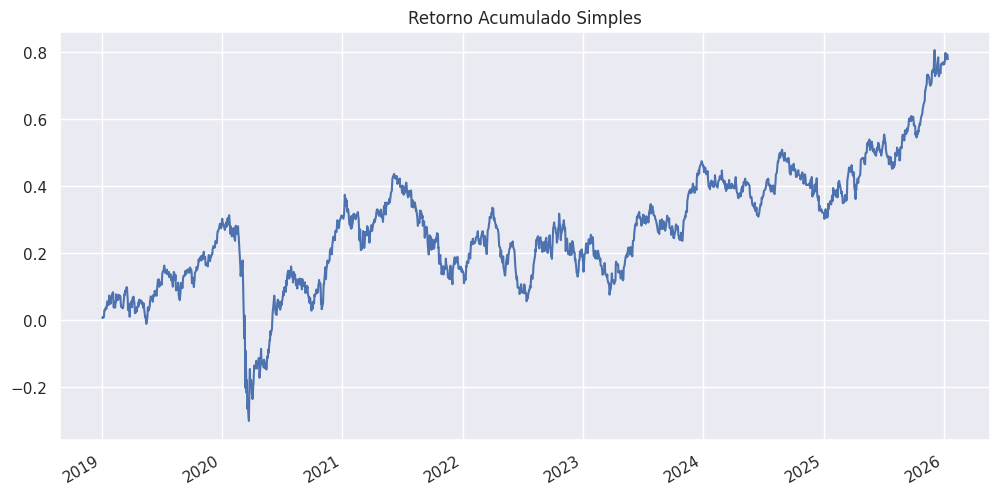

In [10]:
# Calcule o Retorno Simples Multiperíodos Acumulados no tempo
retorno_simples_multiperiodos_acum = (1 + ibovespa['retorno_simples']).cumprod() - 1

# Cria o gráfico
retorno_simples_multiperiodos_acum.plot(figsize=(12, 6))
plt.title('Retorno Acumulado Simples')
plt.xlabel('')
plt.ylabel('')
plt.show()

## 7. **Retorno Composto Continuadamente (Log-Retorno) Multiperíodos:**
   - Usado para avaliar o desempenho de um investimento ao longo de múltiplos períodos de forma contínua.
   - Calculado somando os log-retornos de cada período.
   - Formulação matemática: $\text{Log-Retorno Multiperíodos} = \Sigma_{i=1}^Nr_t $

In [11]:
# Calcule o Log-Retorno Multiperíodos
log_retorno_multiperiodos = ibovespa['log_retorno'].sum()
log_retorno_multiperiodos

np.float64(0.5764382887204029)

In [12]:
# Calcule o Log-Retorno Multiperíodos Acumulados
log_retorno_multiperiodos_acum = ibovespa['log_retorno'].cumsum()
log_retorno_multiperiodos_acum

,log_retorno
Date,
2019-01-02,NaN
2019-01-03,0.006047
2019-01-04,0.009067
2019-01-07,0.007520
2019-01-08,0.011145
...,...
2026-01-07,0.576451
2026-01-08,0.582372
2026-01-09,0.585026


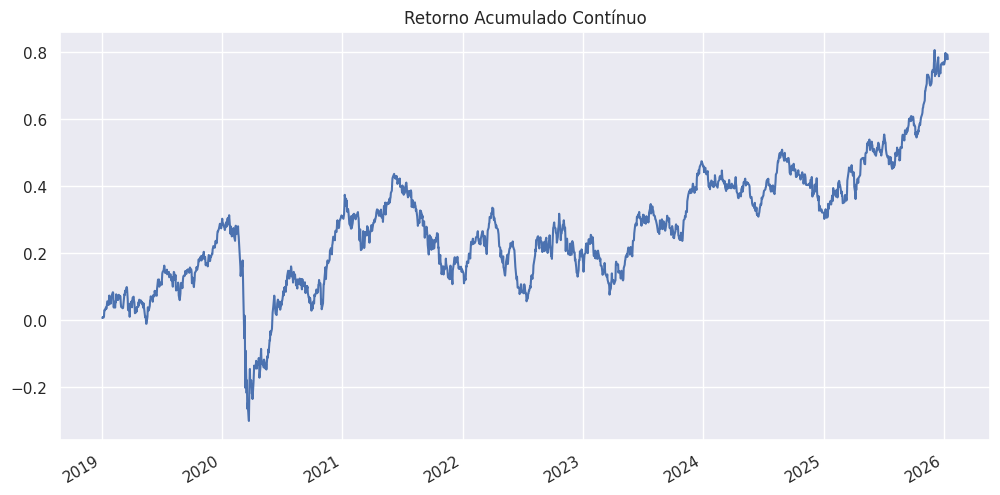

In [13]:
# Cria o gráfico
retorno_simples_multiperiodos_acum.plot(figsize=(12, 6))
plt.title('Retorno Acumulado Contínuo')
plt.xlabel('')
plt.ylabel('')
plt.show()

# **Retorno Anualizado:**



## 8. **Retorno Anualizado para Retornos Simples:**
   - Utilizado para expressar o retorno de um investimento em uma base anual, mesmo que o período de investimento seja menor que um ano.
   - Calculado multiplicando o retorno simples pelo número de períodos em um ano.
   - Formulação matemática: $\text{Retorno Anualizado Simples} = \frac{1}{N-1}\Sigma_{i=1}^N R_t \times 252$

In [14]:
# Calcule o Retorno Anualizado para Retornos Simples
retorno_anualizado_simples = np.mean(ibovespa['retorno_simples']) * 252
retorno_anualizado_simples

np.float64(0.11095409482074081)


## 9. **Retorno Anualizado para Retornos Geométricos:**
   - Usado para calcular o retorno anualizado de investimentos de longo prazo que consideram o reinvestimento de ganhos.
   - Calculado usando a fórmula (para o caso de diário, com 252 dias úteis): $\text{Retorno Anualizado Geométrico} = \left[(1 + R_t) \cdot (1 + R_{t-1}) \cdot \ldots \cdot (1 + R_1)\right]^{\frac{252}{N}} - 1$

In [15]:
# Calcule o Retorno Anualizado para Retornos Geométricos
n = len(ibovespa['retorno_simples'].dropna())

retorno_anualizado_geometrico = (np.prod(1 + ibovespa['retorno_simples']) ** (252 / n)) - 1
retorno_anualizado_geometrico

np.float64(0.08660110637303453)

## 10. Retorno Anualizado em Janelas Deslizantes

  - Calcula a taxa de retorno média anualizada em períodos móveis, útil para análise de tendências e volatilidade ao longo do tempo.
  - Para calcular o retorno anualizado móvel em uma janela deslizante, você calcula o retorno anualizado para cada janela e move a janela ao longo do conjunto de dados.
  - A fórmula é a seguinte para o aritmético e geométrico, respectivamente:

  $\text{Retorno Anualizado Simples} = \frac{1}{T-1}\Sigma_{i=1}^N R_t \times 252$
  
  $\text{Retorno Anualizado Geométrico} = \left[(1 + Retorno\,Geométrico)^{\frac{252}{T}} - 1\right]$

  Onde:
   - $T$ é o tamanho fixo da janela (por exemplo, 252 para um ano ou 22 para um mês).

In [16]:
# Calcule o Retorno Anualizado em Janelas Deslizantes
ibovespa['retorno_an_mean'] = ibovespa['retorno_simples'].rolling(window = 252).mean() * 252

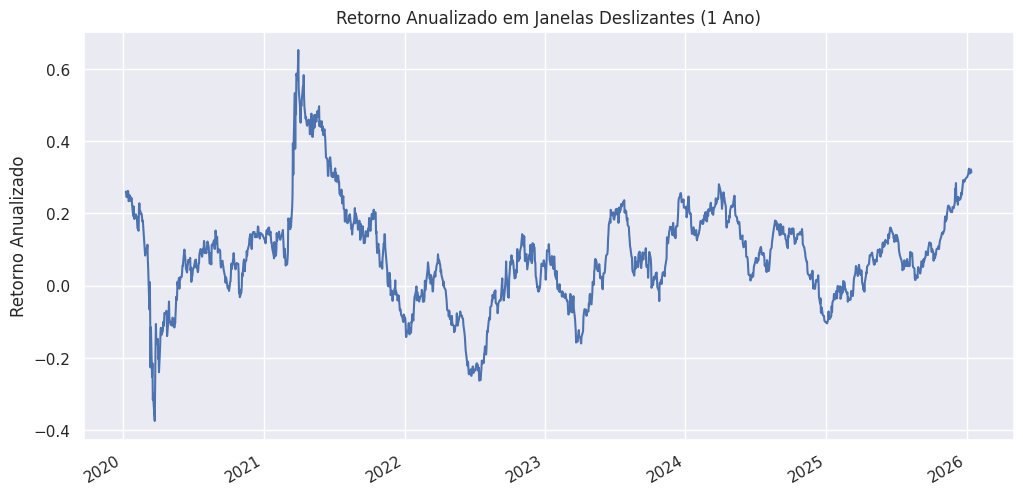

In [17]:
# Cria o gráfico
ibovespa['retorno_an_mean'].plot(figsize=(12, 6))
plt.title('Retorno Anualizado em Janelas Deslizantes (1 Ano)')
plt.xlabel('')
plt.ylabel('Retorno Anualizado')
plt.show()

In [18]:
# Calcule o Retorno Anualizado Geométrico em Janelas Deslizantes
def geometric_annualized_return(data):
    return (1 + data).prod() ** (252 / len(data)) - 1

# Aplica o cálculo
ibovespa['retorno_an_geom'] = ibovespa['retorno_simples'].rolling(window = 252).apply(geometric_annualized_return)

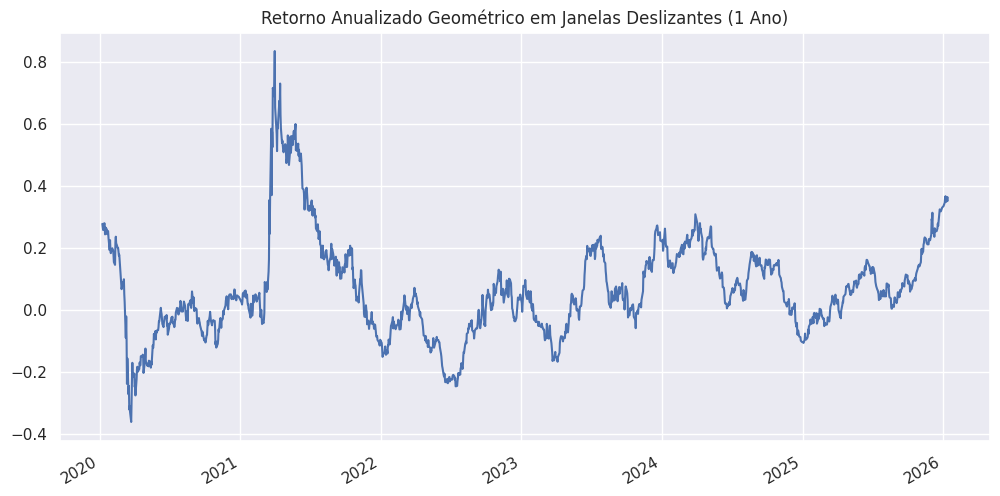

In [19]:
# Plot o gráfico do Retorno Anualizado Geométrico em Janelas Deslizantes
ibovespa['retorno_an_geom'].plot(figsize=(12, 6))
plt.title('Retorno Anualizado Geométrico em Janelas Deslizantes (1 Ano)')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Volatilidade

## 1. **Desvio Padrão (Volatilidade):**
   O desvio padrão é uma medida de dispersão que indica a variabilidade dos retornos de um ativo ou investimento. Ele mede o grau de volatilidade do ativo.

   **Fórmula:**
   O desvio padrão é calculado da seguinte maneira para uma série de retornos:
   
   $$ \text{Desvio Padrão} = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (R_i - \overline{R})^2} $$
   Onde:
   - $N$ é o número de observações (dias, meses, anos, etc.).
   - $R_i$ é o retorno no período $i$.
   - $\overline{R}$ é a média dos retornos.

In [20]:
# Calcula o desvio padrão
ibovespa['retorno_simples'].std(ddof = 1)

0.014790304459494748

## 2. **Desvio Padrão Anualizado:**
   
   O desvio padrão anualizado é o desvio padrão dos retornos ajustado para um período anual. Isso é útil para comparar a volatilidade em uma base anual.

   **Fórmula:**
   Para anualizar o desvio padrão, você multiplica o desvio padrão da série de retornos por uma raiz quadrada do número de períodos em um ano (geralmente 252 para dias de negociação ou 12 para meses).

   $$ \text{Desvio Padrão Anualizado} = \text{Desvio Padrão} \times \sqrt{N} $$

   Onde $N$ é o número de períodos de observação em um ano (por exemplo, 252 para dados diários e 12 para meses).

In [21]:
# Calcula o desvio padrão anualizado
ibovespa['retorno_simples'].std(ddof = 1) * np.sqrt(252)

np.float64(0.23478880448851616)

## 3. **Desvio Padrão Móvel (ou Desvio Padrão em Janelas Deslizantes):**
   O desvio padrão móvel é usado para avaliar a volatilidade ao longo do tempo, calculando o desvio padrão em janelas deslizantes (móveis) de dados.

   **Fórmula:**
   Para calcular o desvio padrão móvel em uma janela deslizante, você calcula o desvio padrão para cada janela e move a janela ao longo do conjunto de dados.

   $$ \text{Desvio Padrão Móvel} = \sqrt{\frac{1}{T-1} \sum_{i=1}^{T} (R_i - \overline{R})^2} $$

   Onde:
   - $T$ é o tamanho da janela (por exemplo, 252 para um ano ou 22 para um mês).
   - $R_i$ são os retornos dentro da janela.
   - $\overline{R}$ é a média dos retornos dentro da janela.



In [22]:
# Calcule o desvio padrão em janelas deslizantes
ibovespa['desvio_padrao'] = ibovespa['retorno_simples'].rolling(window = 44).std(ddof = 1)

ibovespa

Price,Close,High,Low,Open,Volume,retorno_simples,retorno_bruto_simples,log_retorno,retorno_an_mean,retorno_an_geom,desvio_padrao
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP,,,,,,
Date,,,,,,,,,,,
2019-01-02,91012.0,91479.0,87536.0,87887.0,5615400,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,91564.0,91596.0,89922.0,91011.0,6066200,0.006065,1.006065,0.006047,NaN,NaN,NaN
2019-01-04,91841.0,92701.0,90824.0,91577.0,5322100,0.003025,1.003025,0.003021,NaN,NaN,NaN
2019-01-07,91699.0,92552.0,91288.0,91845.0,4565000,-0.001546,0.998454,-0.001547,NaN,NaN,NaN
2019-01-08,92032.0,92231.0,91064.0,91699.0,4496500,0.003631,1.003631,0.003625,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2026-01-07,161975.0,163661.0,161746.0,163661.0,8846600,-0.010320,0.989680,-0.010374,0.323875,0.366497,0.010689
2026-01-08,162937.0,162937.0,161748.0,161975.0,8607700,0.005939,1.005939,0.005922,0.317252,0.357559,0.010696


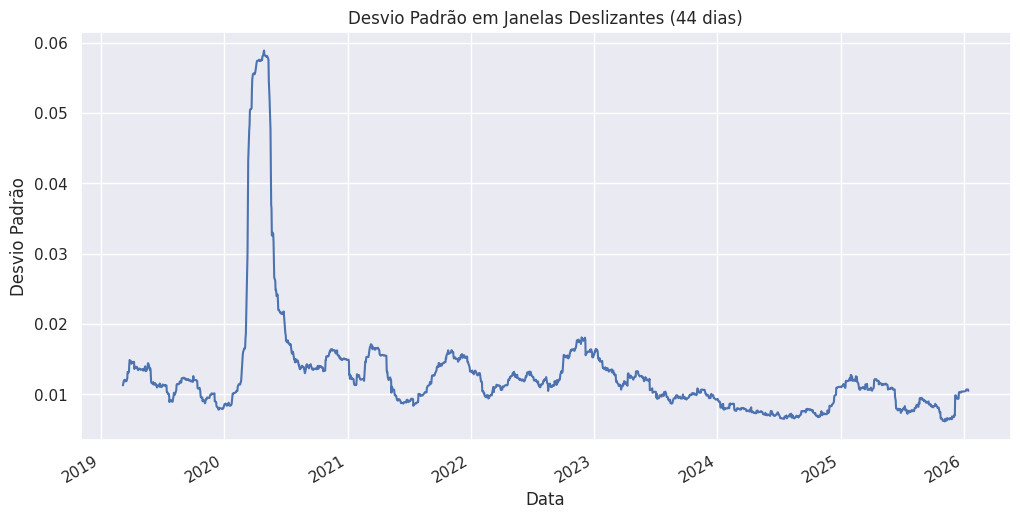

In [23]:
# Plot o gráfico do desvio padrão em janelas deslizantes
ibovespa['desvio_padrao'].plot(figsize=(12, 6))
plt.title('Desvio Padrão em Janelas Deslizantes (44 dias)')
plt.xlabel('Data')
plt.ylabel('Desvio Padrão')
plt.show()

In [24]:
# Calcule o desvio padrão em janelas deslizantes
ibovespa['desvio_padrao_an'] = ibovespa['desvio_padrao'] * np.sqrt(252)
ibovespa

Price,Close,High,Low,Open,Volume,retorno_simples,retorno_bruto_simples,log_retorno,retorno_an_mean,retorno_an_geom,desvio_padrao,desvio_padrao_an
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP,,,,,,,
Date,,,,,,,,,,,,
2019-01-02,91012.0,91479.0,87536.0,87887.0,5615400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,91564.0,91596.0,89922.0,91011.0,6066200,0.006065,1.006065,0.006047,NaN,NaN,NaN,NaN
2019-01-04,91841.0,92701.0,90824.0,91577.0,5322100,0.003025,1.003025,0.003021,NaN,NaN,NaN,NaN
2019-01-07,91699.0,92552.0,91288.0,91845.0,4565000,-0.001546,0.998454,-0.001547,NaN,NaN,NaN,NaN
2019-01-08,92032.0,92231.0,91064.0,91699.0,4496500,0.003631,1.003631,0.003625,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-07,161975.0,163661.0,161746.0,163661.0,8846600,-0.010320,0.989680,-0.010374,0.323875,0.366497,0.010689,0.169685
2026-01-08,162937.0,162937.0,161748.0,161975.0,8607700,0.005939,1.005939,0.005922,0.317252,0.357559,0.010696,0.169786


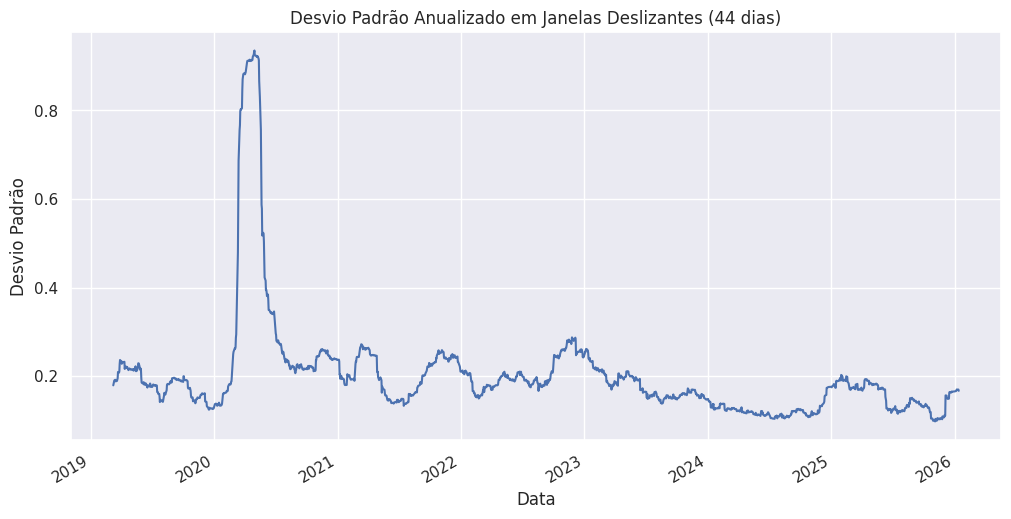

In [25]:
# Plot o gráfico do desvio padrão em janelas deslizantes
ibovespa['desvio_padrao_an'].plot(figsize=(12, 6))
plt.title('Desvio Padrão Anualizado em Janelas Deslizantes (44 dias)')
plt.xlabel('Data')
plt.ylabel('Desvio Padrão')
plt.show()